# Expansion vizualisation algorithm

The purpose of this notebook is first of all to align a stack (movie composed of several images) taken by a microscope in order to correct the movements of the microscope between two images. Then, once the images are aligned, each image will be binarized (transformed into a matrix composed of 0 and 1) to distinguish the microcolonies in the background.  Finally, the binarized images will be added together in order to have a global vision of the evolution of each microcolony and to be able to extract information such as the growth rate.

## Packages

In [1]:
import numpy as np
from numpy import median
import scipy
from scipy import ndimage as ndi
import pandas as pd
import skimage
from skimage import io
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Additional package

The following package is not available directly with the Anaconda distribution and must be installed separately. To install it, simply type the following command in an empty cell:

<em>pip install pystackreg</em>


More information about this package is available here: https://pypi.org/project/pystackreg/

In [2]:
from pystackreg import StackReg

## Alignement and binarization of a stack

In [ ]:
# directory of the stack (movie) 
rootdir = '/path/to/images'
img0 = io.imread(rootdir)
# alignement to the previous image for the frame 4 to frame 40
sr = StackReg(StackReg.TRANSLATION)
out_previous = sr.register_transform_stack(img0[4:40], reference='previous')
# binarization
binary_images = [];
for image in out_previous:
    try:
        # apply otsu algoritme
        thresh = skimage.filters.threshold_otsu(image)
        binary = image > thresh
        # remove artifacts connected to image border
        cleared = clear_border(binary)
    except:
        print("An exception occurred") 
    binary_images.append(cleared)
    # sum all the images of the current position to creat a 2D histogram
    sum_binary = sum(binary_images)

## Vizualisation

Each stack of images is transformed into a 2d histogram, the higher the value of a pixel, the more that pixel appears in a large number of images. In other words, cells with high intensity are the first to appear. It is therefore possible to see the evolution of each microcolony and even when two microcolonies merge together.

Text(0, 0.5, 'pixel intensity')

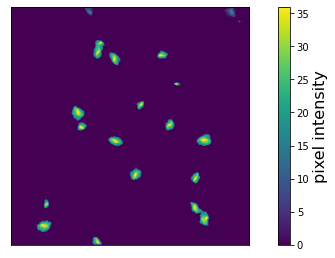

In [5]:
img = np.load(sum_binary)
# plot the array as a figure
plt.figure(figsize=(5, 5))
ax = plt.gca()
im = ax.imshow(img)
ax.set_xticks([])
ax.set_yticks([])
# display a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.4)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel('pixel intensity',fontsize=16)